# Introduction modelling with differential equations

## Supporting material

This chapter's supporting material is [3blue1brown Differential equations, a tourist's guide](https://www.youtube.com/watch?v=p_di4Zn4wz4) and [Veritasium's video on the logistic map](https://youtu.be/ovJcsL7vyrk).

3blue1brown video will help you building an intuition on **why** we use differential equations to understand the behavior of any system. Veritasium's video explains the *logistic map*, a *difference* equation (a differential equation where time is discrete rather than continuous) with very interesting properties. We will see examples of difference equations —such as the SIR infectious disease model— in the second section of this chapter.

Bonus: if you enjoyed the video, you're encouraged to watch [the follow up video on partial differential equations](https://youtu.be/ly4S0oi3Yz8).

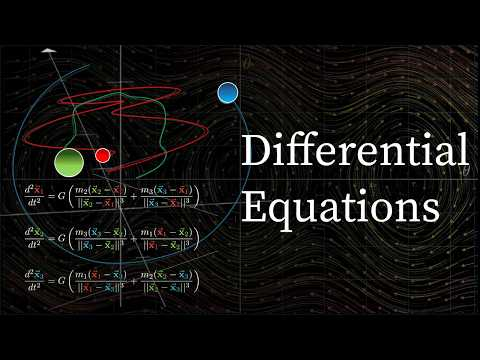

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("p_di4Zn4wz4", width=600, height=400)

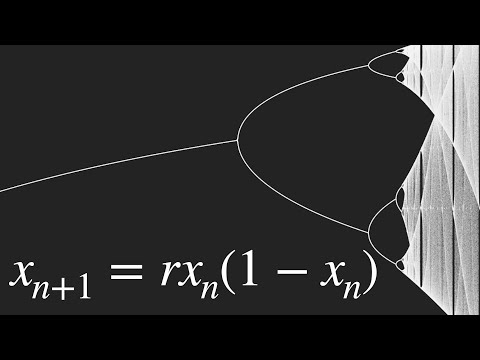

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("ovJcsL7vyrk", width=600, height=400)

## Some taxonomy

### Analytical vs Numerical solutions

In a nutshell, solutions to differential system can be **analytical**: meaning that the solution to the differential equation is a symbolic expression or **numerical**: meaning that the solution to the differential equation is a set of values. If you have the analytical solution, you can easily obtained the numerical values but the opposite is not true.

### Open vs closed dynamical systems

In a closed dynamical system, the map —also called flow— maintains its shape in the state space for all time. On the other hand, in a open system the state-space orbits are not statics and can change over time due to the a changing flow.

## Modelling neurons



It will not come as a surprise: the basic unit of study in neuroscience is the neuron. The neuron acts as the epistemological center of gravity around which all modelling scales orbit. Neurons are specialised cells that possess an electrically excitable membrane and whose main purpose is integrating and transmitting information. They can present very different morphologies, each endowing them of distinct computational capabilities.

In their homeostatic state, neuron membranes observe a potential of $\sim -70mV$ between the interior and the exterior of the cell; in this state the cell is said to be polarised. Neurons' electric excitability arises from the presence of ion channels and ion pumps in their membranes. Ion channels are proteins that regulate the flux of ions between the inside and outside of the cell. By doing so, they enable neurons to communicate: when positively charged ions enter the cell they reduce the membrane potential, a process referred as depolarisation. If the depolarisation reaches a threshold, it will trigger a positive feedback by which more ion channels are opened and the neuron generates an electric binary signal referred to as *spike* or *action potential*. Spikes are pulse-like currents that constitute the fundamental unit of communication between neurons. When a spike reaches the postsynaptic axon terminal, it dissolves the vesicles containing neurotransmitters, releasing them into the postsynaptic cleft.

If the influx of ions into the postsynaptic neuron is positively charged, we talk about excitatory postsynaptic potential (EPSP), conversely, an influx of negatively charged ions that will further polarise the cell is referred to as an inhibitory postsynaptic potential (IPSP). Whether a presynaptic neuron generates EPSPs or IPSPs depends on its neurotransmitter profile which will determine which ion channels open up and, hence, if we have an inhibitory -i.e. polarizing- current (negatively-charged ions) or a excitatory -i.e. depolarizing- current (positively-charged ions). The neurotransmitter profile of a neuron -ie. if it releases inhibitory or excitatory neurotransmitters when activated- determine its inhibitory/excitatory nature and, along with its morphology, determines the computational properties of the neuron. In our computational models, we abstract the notion of inhibitory/excitatory synapses by negative/positive weights in the connectivity matrix of the neural population. For the spiking models these connectivity weights have Volt units [V], reflecting how much the membrane potential of the post-synaptic neuron is decreased/increased when the pre-synaptic neuron is activated; for rate-based models, the connectivity has hertz units [Hz], indicating how much the firing rate of the post-synaptic neuron  decreases/increases when the pre-synaptic neuron is activated.

Both chemical and electrical synapses are modelled in the same fashion: as a set of coupled non-linear differential equations capturing the activity of the ion channels. 

#### Point-neurons

The dynamics of the activations between two neurons require taking into account the distribution of ion-channels across the different sections of the membrane surface as well as the morphology of the membrane itself. This results in  non-linear differential models which are highly faithful but significantly complex.
An useful abstraction is to consider neurons to be point-like, that is, disregarding the spatial properties of the cell membrane similarly to the point particle approximation in physics. In point neurons, dendrites are abstracted into the connectivity the neuron. This abstraction is often used in computational neuroscience but has its limitations, for instance, neurons have been shown to perform crucial computations on their dendrites. Throughout this week and next week exercises, we will restrict our models to point-neurons.

### Integrate and fire (IF) and Leaky-integrate and fire (LIF) neurons 

Integrate-and-fire (IF) models capture the integration of postsynaptic potentials (PSPs) as a simple summation and combine them. If the cumulative sum of PSPs crosses a threshold then the neuron fires a spike. This model can be described with a differential equation used to characterise an electrical RC circuit where the cell membrane acts as a capacitor insulating the conductive intra-cellular and extra-cellular fluids; $V$ is the membrane potential, $I(t)$ is the sum of ionic input currents from presynaptic neurons and $C_{m}$ is the membrane capacitance. It is the ability of the cell membrane to accumulate charges over time that enables the neuron to integrate inputs over time and therefore it is able to perform computations.

$$
I(t) = C_{m} \frac{dV(t)}{dt}
$$

As previously discussed, in order to fire, the membrane voltage of a neuron needs to attain a threshold which, once reached, will inescapably trigger a spike. These activation dynamics can be fully described with the Hodgkin and Huxley ionic currents model. However, IF models do not intrinsically give rise to spikes, instead, a firing-threshold mechanism is added *ad hoc* to generate spikes once the defined threshold is reached and subsequently reset the membrane voltage to its resting value.
This approach has the advantage of greatly reducing the analytical and numerical complexity of differential equation models, which is especially convenient when simulating networks with hundreds of thousands of neurons.

Leaky integrate-and-fire (LIF) is a variation of Integrate-and-fire which adds a term describing the diffusion -or leak- of ions across the cell's membrane that is experimentally observed in neurons.
We start with Kirchhoff's conservation of current law for the current arriving to the cell membrane:

$$
I(t) = I_{C_{m}} + I_{leak}
$$

The cell membrane is not a perfect insulator, therefore besides the current charging the capacitor $I_{C_{m}}$, we have another *leak current* $I_{leak}$ representing the movement of charges -in the form of ions- through the cell membrane. This translates into adding the extra leaky term $I_{leak}=\frac{V(t)}{R_{m}}$ to previous equation which results in the following equation:

$$
I(t) = C_{m} \frac{dV(t)}{dt} + \frac{V(t)}{R_{m}}
$$


In the case $R_{m} \rightarrow \infty$, we retrieve the non-leaky IF model. Finally, to account for the resting potential observed on neurons in the absence of any input current, we add a resting potential term $V_{rest}$ and replace the capacitance term by $\tau_{m}/R_{m}$:

$$
I(t) = \frac{\tau_{m}}{R_{m}} \frac{dV(t)}{dt} + \frac{V(t)-V_{rest}}{R_{m}}
$$

### Numerically solve IF neuron model

As we did to solve the predator-prey model, in order to solve the differential equation we need to define a function that return the right hand side of the equation in the form $\frac{dV}{dt}=f(...)$, where $V$ is the variable we want to solve for. In our case, we are interested in finding what is the membrane potential $V$:

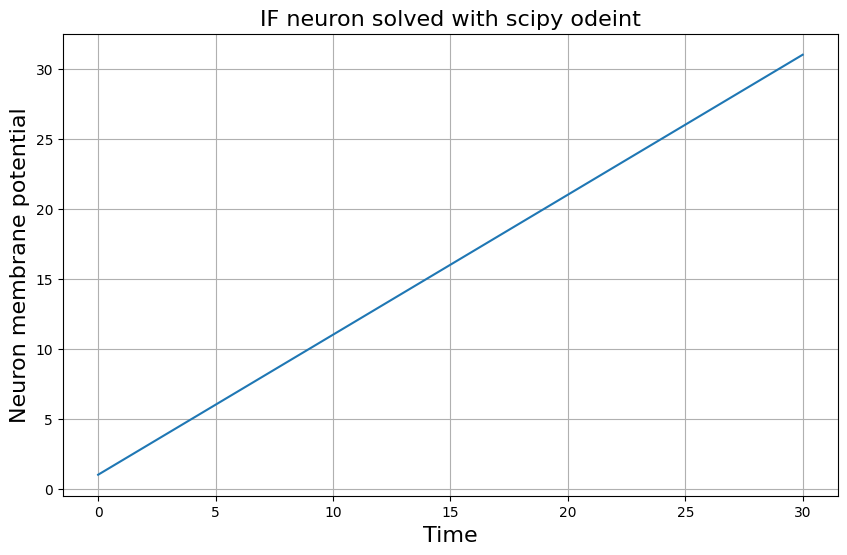

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Define the IF neuron model
def IF(v, t, input_current, membrane_capacitance):
    dvdt = input_current/membrane_capacitance
    return dvdt

# We import scipy ordinary differential equations solver
from scipy.integrate import odeint

#Defined the model parameters
membrane_capacitance = 1.
input_current = 1.

# Initial value of the neuron membrane potential v0
v0 = 1.

# Simulation timesteps
T  = 30.0                             # final time (the units will depend on what units we have chosen for the model constants)
N = 10000                             # number of time-steps for the simulation
t = np.linspace(0.,T, N)

# Call differential equation solver and stores result in variable res
solution_membrane_potential = odeint(IF, v0, t, args = (input_current, membrane_capacitance))

# Plot results
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("IF neuron solved with scipy odeint", fontsize=16)
plt.plot(t, solution_membrane_potential)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Neuron membrane potential', fontsize=16)
plt.show()

We see what we get a straight line as a solution for the Integrate-Fire neuron. This makes sense since we are basically solving a single differential equation of the form $y' = k$, where $k$ is a constant. From calculus, you know that that equation has a solution of the form $ky$ which geometrically represents a straight line.

### **Exercise: Solve LIF neuron model numerically**

To make our model more interesting, we will add a leaky term. That is, a current of ions that is constantly leaving the cell.
As we did before, we first need to write of differential equation in the form of $\frac{dV}{dt}=f(...)$, we can simply re-arrange the terms of LIF equation given above

$$
I(t) = C_{m} \frac{dV(t)}{dt} + \frac{V(t)}{R_{m}}
$$

to the form:

$$
\frac{dV(t)}{dt} = \frac{I(t) - \frac{V(t)}{R_{m}} }{C_{m}}
$$

- Define a function `LIF` which returns the right hand side of the above equation:

In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Define the LIF neuron model
def LIF(v, t, input_current, membrane_capacitance, membrane_resistance):
    
    ## Your code here


SyntaxError: incomplete input (3746202658.py, line 7)

- Use the code from above that we used to solve the IF model and adapt it as needed to solve this new neuron model:

In [ ]:
## Your code here

- Plot the found membrane potential and discuss its biological interpretation.

In [ ]:
## Your code here

- Explore the behavior of the neuron membrane for different values of the model. Add all the code you have used to solve the neuron LIF model: the `LIF` function definition, the calling to Scipy ODE solver and the plotting. The lines already written are responsible for making an interactive plot in the Colab. They model will be solve with the new constants every time you change their values on the slide. Notice that you can easily define ranges for the slides. This Colab feature —and its [IPython Jupiter notebooks equivalent](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)— are a great way of quickly exploring models behaviors.

In [ ]:
#@title  { run: "auto", vertical-output: true }
membrane_capacitance = 1.0 #@param {type:"slider", min:1, max:10, step:0.5}
membrane_resistance  = 1.0 #@param {type:"slider", min:1, max:10, step:0.5}
input_current = 1.0 #@param {type:"slider", min:1, max:10, step:0.5}
initial_membrane_potential = 10 #@param {type:"slider", min:-20, max:20, step:0.5}

## Your code here

Notice that the behavior of these neuron model does not produce action potentials. To observe action potentials, LIF models are coupled with a reset mechanism that resets the membrane potential after it has reached a given value. Since this behavior does not emerge from the LIF differential equation, we would need to manually implement ourselves in the code. Next week we will see how we can use [Brian2](brian2.readthedocs.io/) to simulate populations of LIF neurons and obtain spiking behaviors. Brian will deal under the hood with solving the differential equations and we will focus on defining our model.